In [1]:
%cd C:\\Users\\s\\Downloads\\machine_learning\\machine-learning-ex1\\ex1
%pwd

C:\Users\s\Downloads\machine_learning\machine-learning-ex1\ex1


'C:\\Users\\s\\Downloads\\machine_learning\\machine-learning-ex1\\ex1'

## Linear regression with one variable

(97, 2)


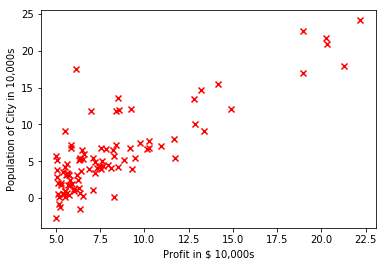

In [11]:
import numpy as np
import matplotlib.pyplot as plt


data1 = np.loadtxt('ex1data1.txt', delimiter=',')
data1 = np.array(data1)
print(data1.shape)

x10 = data1[:, 0][:, np.newaxis]
y10 = data1[:, 1][:, np.newaxis]

def plot_data(x, y):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(x, y, color='r', marker='x')
    ax.set_xlabel('Profit in $ 10,000s')
    ax.set_ylabel('Population of City in 10,000s')
    plt.show()
    

plot_data(x10, y10)

### Gradient Descent

In [16]:
m10 = np.shape(y10)[0]
x10_mat = np.hstack((np.ones((m10, 1)), x10))


def compute_cost(x_mat, y, theta):
    j = 1 / (2 * np.shape(x_mat)[0]) * np.sum((x_mat.dot(theta) - y) ** 2)
    
    return j


theta10 = np.zeros((2, 1))
print(compute_cost(x10_mat, y10, theta10))
print(compute_cost(x10_mat, y10, np.array([[-1], [2]])))

32.072733877455676
54.24245508201238


No handles with labels found to put in legend.


[[-3.63029144]
 [ 1.16636235]]
[6.73719046 5.93159357 5.90115471 ... 4.48343473 4.48341145 4.48338826]


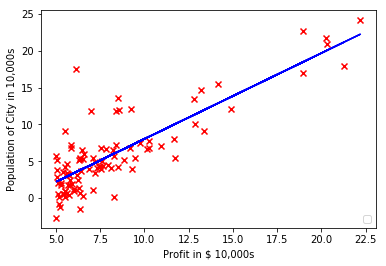

In [8]:
def grad_descent(x_mat, y, theta, alpha, iterations):
    j_history = np.zeros(iterations)
    for i in range(iterations):
        theta = theta - alpha / np.shape(x_mat)[0] * x_mat.T.dot(x_mat.dot(theta) - y)
        j_history[i] = compute_cost(x_mat, y, theta)

    return theta, j_history


iter10 = 1500
alpha10 = 0.01
theta11, j_history11 = grad_descent(x10_mat, y10, theta10, alpha10, iter10)
print(theta11)
print(j_history11)

plt.subplot(111)
plt.scatter(x10, y10, color='r', marker='x')
plt.plot(x10, x10_mat.dot(theta11), 'b-')
plt.legend(loc=4)
plt.xlabel('Profit in $ 10,000s')
plt.ylabel('Population of City in 10,000s')
plt.show()

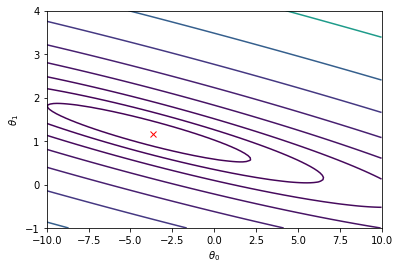

In [9]:
theta10_vals = np.linspace(-10, 10, 100)
theta11_vals = np.linspace(-1, 4, 100)
j_vals = np.zeros((100, 100))

for i in range(100):
    for j in range(100):
        t = np.array([[theta10_vals[i]], [theta11_vals[j]]])
        j_vals[i, j] = compute_cost(x10_mat, y10, t)

plt.subplot(111)
plt.contour(theta10_vals, theta11_vals, j_vals.T, np.logspace(-2, 3, 20))
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.plot(theta11[0, 0], theta11[1, 0], color='r', marker='x')
plt.show()

## Linear regression with multiple variables

In [14]:
data2 = np.loadtxt('ex1data2.txt', delimiter=',')
print(data2.shape)
x20 = data2[:, 0:-1]
y20 = data2[:, -1][:, np.newaxis]

(47, 3)


### Feature Normalization

In [15]:
def feature_norm(x):
    mu = np.mean(x, axis=0)
    sigma = np.std(x, axis=0)
    x = (x - mu) / sigma

    return x, mu, sigma


x20_norm, mu20, sigma20 = feature_norm(x20)

### Gradient Descent

In [18]:
m20 = y20.shape[0]
x20_mat = np.hstack((np.ones((m20, 1)), x20_norm))


def compute_cost_multi(x_mat, y, theta):
    j = 1 / (2 * np.shape(x_mat)[0]) * (x_mat.dot(theta) - y).T.dot(x_mat.dot(theta) - y)

    return j


theta20 = np.zeros((x20_mat.shape[1], 1))
j20 = compute_cost_multi(x20_mat, y20, theta20)
print(j20)

[[6.55915481e+10]]


[[340311.97753869]
 [107538.93514181]
 [ -4669.66096829]]
[[297999.80370405]]


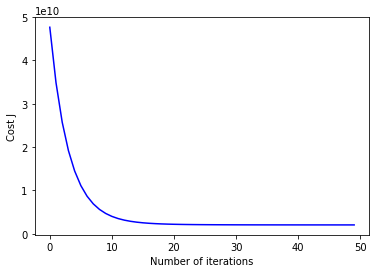

In [23]:
def gradient_descent_multi(x_mat, y, alpha, theta, iterations):
    j_history = np.zeros(iterations)
    for i in range(iterations):
        theta = theta - alpha / np.shape(x_mat)[0] * x_mat.T.dot(x_mat.dot(theta) - y)
        j_history[i] = compute_cost_multi(x_mat, y, theta)

    return theta, j_history


alpha20 = 0.15
iterations20 = 50
theta21, j_history21 = gradient_descent_multi(x20_mat, y20, alpha20, theta20, iterations20)

print(theta21)

plt.plot(j_history21, 'b-')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

predicted = theta21.T.dot(np.array([[1], [(1650 - mu20[0]) / sigma20[0]], [3 - mu20[1] / sigma20[1]]]))
print(predicted)

### Normal Equations

In [24]:
def normal_eqn(x_mat, y):
    theta = np.linalg.pinv(x_mat.T.dot(x_mat)).dot(x_mat.T).dot(y)

    return theta


x21_mat = np.hstack((np.ones((m20, 1)), x20))
theta22 = normal_eqn(x21_mat, y20)
print(theta22)

predicted0 = theta22.T.dot(np.array([[1], [1650], [3]]))
print(predicted0)


[[89597.90954361]
 [  139.21067402]
 [-8738.01911255]]
[[293081.46433499]]
